In [1]:
! pip install networkx matplotlib

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 13.2 MB/s eta 0:00:00



Pre-order traversal of the tree:
Node 1: Info=10, Color=red, Left=2, Right=3
Node 2: Info=5, Color=black, Left=0, Right=0
Node 3: Info=20, Color=black, Left=4, Right=5
Node 4: Info=15, Color=red, Left=0, Right=0
Node 5: Info=30, Color=red, Left=0, Right=0

In-order traversal of the tree:
Node 2: Info=5, Color=black, Left=0, Right=0
Node 1: Info=10, Color=red, Left=2, Right=3
Node 4: Info=15, Color=red, Left=0, Right=0
Node 3: Info=20, Color=black, Left=4, Right=5
Node 5: Info=30, Color=red, Left=0, Right=0


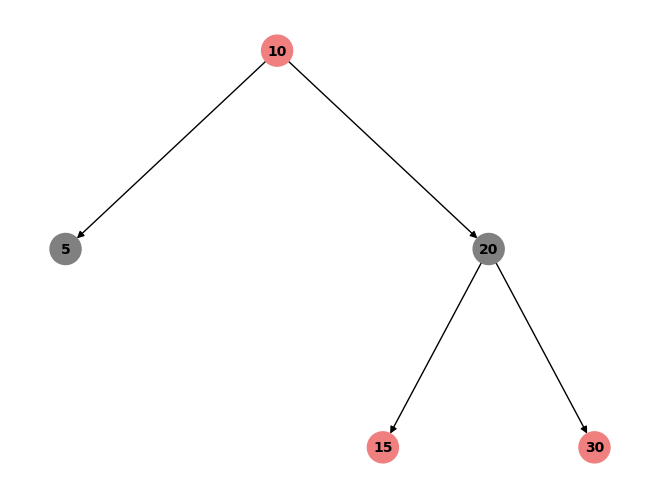

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Constants for indices in the node
INFO = 0
LEFT = 1
RIGHT = 2
COLOR = 3
NULL = 0  # Using 0 as null

# Initialize the tree array
def initialize_tree(size=1001):
    tree = [[0, 0, 0, ''] for _ in range(size)]  # Initialize with 1001 nodes (index 0 + 1000 free nodes)
    tree[0][LEFT] = NULL  # Root starts as empty (0)
    tree[0][RIGHT] = 1  # Free list starts at node 1
    for i in range(1, size - 1):
        tree[i][RIGHT] = i + 1  # Link all free nodes
    tree[size - 1][RIGHT] = NULL  # Last free node points to null
    return tree

# Expand the tree with 1000 more nodes
def expand_tree(tree):
    current_size = len(tree)
    tree.extend([[0, 0, 0, ''] for _ in range(1000)])  # Expand by 1000
    new_size = len(tree)
    free_head = current_size  # New free list starts at the old end
    tree[0][RIGHT] = free_head  # Point free list head to the new start
    for i in range(free_head, new_size - 1):
        tree[i][RIGHT] = i + 1  # Link all new free nodes
    tree[new_size - 1][RIGHT] = NULL  # Last new node points to null

# Allocate a new node from the free list
def allocate_node(tree):
    free_head = tree[0][RIGHT]
    if free_head == NULL:
        expand_tree(tree)  # If no free nodes, expand the tree
        free_head = tree[0][RIGHT]
    tree[0][RIGHT] = tree[free_head][RIGHT]  # Move the free list head to the next node
    tree[free_head] = [0, NULL, NULL, '']  # Reset the new node
    return free_head

# Insert a new node into the tree
def insert_node(tree, value, color='black'):
    new_node = allocate_node(tree)
    tree[new_node][INFO] = value
    tree[new_node][COLOR] = color

    # Insert into the tree (binary search tree logic for simplicity)
    root = tree[0][LEFT]
    if root == NULL:
        tree[0][LEFT] = new_node  # Set the root if the tree is empty
        return

    current = root
    while True:
        if value < tree[current][INFO]:  # Go to the left
            if tree[current][LEFT] == NULL:
                tree[current][LEFT] = new_node
                break
            else:
                current = tree[current][LEFT]
        else:  # Go to the right
            if tree[current][RIGHT] == NULL:
                tree[current][RIGHT] = new_node
                break
            else:
                current = tree[current][RIGHT]

# In-order traversal to display the tree
def inorder_traversal(tree, node,result= []):
    if node == NULL:
        return
    inorder_traversal(tree, tree[node][LEFT])
    result.append(tree[node][INFO])
    print(f"Node {node}: Info={tree[node][INFO]}, Color={tree[node][COLOR]}, Left={tree[node][LEFT]}, Right={tree[node][RIGHT]}")
    inorder_traversal(tree, tree[node][RIGHT])

# Pre-order traversal to display the tree
def preorder_traversal(tree, node,result = []):
    if node == NULL:
        return
    print(f"Node {node}: Info={tree[node][INFO]}, Color={tree[node][COLOR]}, Left={tree[node][LEFT]}, Right={tree[node][RIGHT]}")
    result.append(tree[node][INFO])
    preorder_traversal(tree, tree[node][LEFT])
    preorder_traversal(tree, tree[node][RIGHT])


# Pre-order traversal to display the tree
def postorder_traversal(tree, node,result = []):
    if node == NULL:
        return
    print(f"Node {node}: Info={tree[node][INFO]}, Color={tree[node][COLOR]}, Left={tree[node][LEFT]}, Right={tree[node][RIGHT]}")
    postorder_traversal(tree, tree[node][LEFT])
    postorder_traversal(tree, tree[node][RIGHT])
    result.append(tree[node][INFO])

# Visualization function using networkx with hierarchical tree layout
def visualize_tree(tree):
    G = nx.DiGraph()  # Directed graph for tree
    root = tree[0][LEFT]
    pos = {}  # Dictionary to store positions of nodes

    def add_edges(node, x=0, y=0, x_offset=1):
        if node == NULL:
            return
        pos[tree[node][INFO]] = (x, y)  # Assign position based on x and y coordinates
        left_child = tree[node][LEFT]
        right_child = tree[node][RIGHT]

        if left_child != NULL:
            G.add_edge(tree[node][INFO], tree[left_child][INFO])
            add_edges(left_child, x - x_offset, y - 1, x_offset / 2)  # Move left child to the left
        if right_child != NULL:
            G.add_edge(tree[node][INFO], tree[right_child][INFO])
            add_edges(right_child, x + x_offset, y - 1, x_offset / 2)  # Move right child to the right

    # Start adding edges from the root
    add_edges(root)

    # Get colors for nodes based on their color attribute
    node_colors = ['gray' if tree[node][COLOR] == 'black' else 'lightcoral' if tree[node][COLOR] == 'red' else tree[node][COLOR] for node in range(1, len(tree)) if tree[node][INFO] != 0]

    # Draw the tree with specified positions
    nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_colors, font_size=10, font_weight="bold", arrows=True)
    plt.show()

# Example usage
tree = initialize_tree()

# Insert values into the tree
insert_node(tree, 10, 'red')
insert_node(tree, 5, 'black')
insert_node(tree, 20, 'black')
insert_node(tree, 15, 'red')
insert_node(tree, 30, 'red')

# Display the tree using pre-order traversal
print("\nPre-order traversal of the tree:")
preorder_traversal(tree, tree[0][LEFT])

# Display the tree using in-order traversal
# print("\nIn-order traversal of the tree:")
# inorder_traversal(tree, tree[0][LEFT])

# Visualize the tree with enforced hierarchy
visualize_tree(tree)


In [3]:
def calculate_tree_size(tree,node):
  if node == NULL:
    return 0
  return 1+calculate_tree_size(tree,tree[node][LEFT]) + calculate_tree_size(tree, tree[node][RIGHT])

In [9]:
def calculate_tree_depth(tree,node):
  if node == NULL:
    return 0
  left_depth = calculate_tree_depth(tree, tree[node][LEFT])
  right_depth = calculate_tree_depth(tree, tree[node][RIGHT])
  return 1 + max(left_depth,right_depth)

In [8]:
def calculate_tree_width_and_sum(tree, root):
    if root == NULL:
        return {}
    depth_info = {}
    queue = [(root, 0)]  
    while queue:
        current, depth = queue.pop(0)
        if depth not in depth_info:
            depth_info[depth] = {'count': 0, 'sum': 0}
        depth_info[depth]['count'] += 1
        depth_info[depth]['sum'] += tree[current][INFO]
        left_child = tree[current][LEFT]
        right_child = tree[current][RIGHT]

        if left_child != NULL:
            queue.append((left_child, depth + 1))
        if right_child != NULL:
            queue.append((right_child, depth + 1))

    return depth_info

In [10]:
def serialize_tree(tree, node):
    if node == NULL:
        return ""
    result = str(tree[node][INFO])
    left_child = tree[node][LEFT]
    right_child = tree[node][RIGHT]

    if left_child != NULL or right_child != NULL: 
        result += "(" + serialize_tree(tree, left_child)  
        if right_child != NULL:
            result += ")(" + serialize_tree(tree, right_child) + ")"
        else:
            result += ")"
    
    return result

In [11]:
def breadth_first_traversal(tree):
    result = []
    queue = deque()  
    root = tree[0][LEFT] 
    if root != NULL:
        queue.append(root) 

    while queue:  
        current_node = queue.popleft()  
        result.append(tree[current_node][INFO])  

        left_child = tree[current_node][LEFT]
        right_child = tree[current_node][RIGHT]
        if left_child != NULL:
            queue.append(left_child)
        if right_child != NULL:
            queue.append(right_child)

    return result

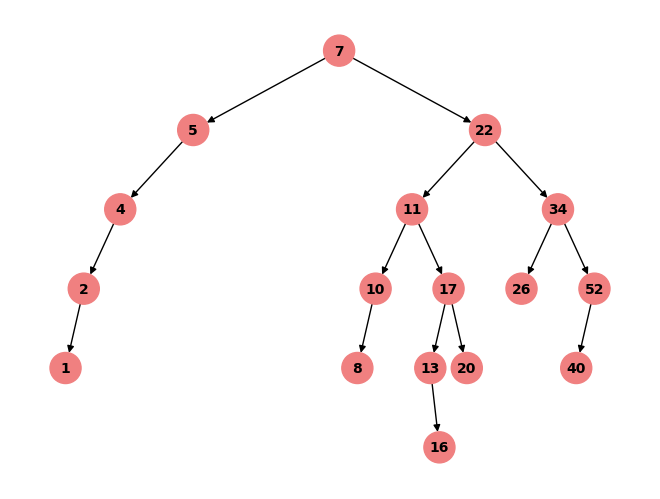

Tree size: 17
Tree depth: 6
Depth 0: Count = 1, Sum = 7
Depth 1: Count = 2, Sum = 27
Depth 2: Count = 3, Sum = 49
Depth 3: Count = 5, Sum = 107
Depth 4: Count = 5, Sum = 82
Depth 5: Count = 1, Sum = 16
Node 1: Info=10, Color=red, Left=2, Right=3
Node 2: Info=5, Color=black, Left=0, Right=0
Node 3: Info=20, Color=black, Left=4, Right=5
Node 4: Info=15, Color=red, Left=0, Right=0
Node 5: Info=30, Color=red, Left=0, Right=0
Pre-order Traversal: 10
Node 2: Info=5, Color=black, Left=0, Right=0
Node 1: Info=10, Color=red, Left=2, Right=3
Node 4: Info=15, Color=red, Left=0, Right=0
Node 3: Info=20, Color=black, Left=4, Right=5
Node 5: Info=30, Color=red, Left=0, Right=0
In-order Traversal: 10
Node 1: Info=10, Color=red, Left=2, Right=3
Node 2: Info=5, Color=black, Left=0, Right=0
Node 3: Info=20, Color=black, Left=4, Right=5
Node 4: Info=15, Color=red, Left=0, Right=0
Node 5: Info=30, Color=red, Left=0, Right=0
Post-order Traversal: 10
Serialized Representation: 7(5(4(2(1))))(22(11(10(8))(17(

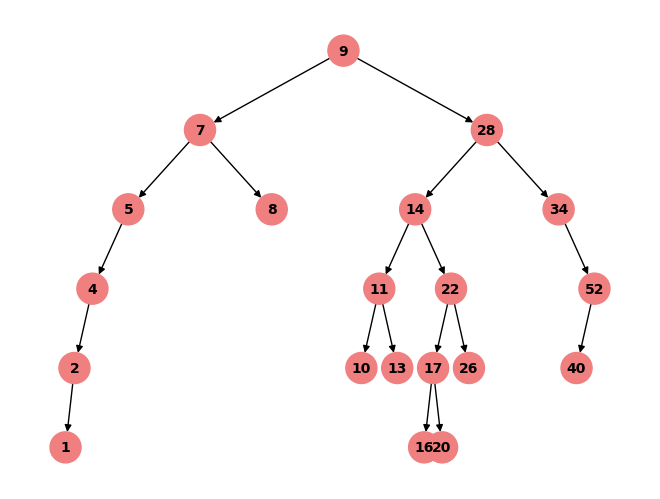

Tree size: 20
Tree depth: 6
Depth 0: Count = 1, Sum = 9
Depth 1: Count = 2, Sum = 35
Depth 2: Count = 4, Sum = 61
Depth 3: Count = 4, Sum = 89
Depth 4: Count = 6, Sum = 108
Depth 5: Count = 3, Sum = 37
Node 1: Info=10, Color=red, Left=2, Right=3
Node 2: Info=5, Color=black, Left=0, Right=0
Node 3: Info=20, Color=black, Left=4, Right=5
Node 4: Info=15, Color=red, Left=0, Right=0
Node 5: Info=30, Color=red, Left=0, Right=0
Pre-order Traversal: 10
Node 2: Info=5, Color=black, Left=0, Right=0
Node 1: Info=10, Color=red, Left=2, Right=3
Node 4: Info=15, Color=red, Left=0, Right=0
Node 3: Info=20, Color=black, Left=4, Right=5
Node 5: Info=30, Color=red, Left=0, Right=0
In-order Traversal: 10
Node 1: Info=10, Color=red, Left=2, Right=3
Node 2: Info=5, Color=black, Left=0, Right=0
Node 3: Info=20, Color=black, Left=4, Right=5
Node 4: Info=15, Color=red, Left=0, Right=0
Node 5: Info=30, Color=red, Left=0, Right=0
Post-order Traversal: 10
Serialized Representation: 9(7(5(4(2(1))))(8))(28(14(11(1

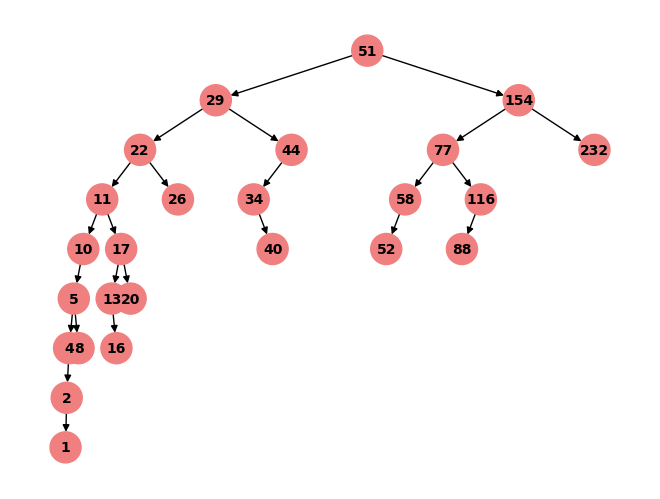

Tree size: 25
Tree depth: 9
Depth 0: Count = 1, Sum = 51
Depth 1: Count = 2, Sum = 183
Depth 2: Count = 4, Sum = 375
Depth 3: Count = 5, Sum = 245
Depth 4: Count = 5, Sum = 207
Depth 5: Count = 3, Sum = 38
Depth 6: Count = 3, Sum = 28
Depth 7: Count = 1, Sum = 2
Depth 8: Count = 1, Sum = 1
Node 1: Info=10, Color=red, Left=2, Right=3
Node 2: Info=5, Color=black, Left=0, Right=0
Node 3: Info=20, Color=black, Left=4, Right=5
Node 4: Info=15, Color=red, Left=0, Right=0
Node 5: Info=30, Color=red, Left=0, Right=0
Pre-order Traversal: 10
Node 2: Info=5, Color=black, Left=0, Right=0
Node 1: Info=10, Color=red, Left=2, Right=3
Node 4: Info=15, Color=red, Left=0, Right=0
Node 3: Info=20, Color=black, Left=4, Right=5
Node 5: Info=30, Color=red, Left=0, Right=0
In-order Traversal: 10
Node 1: Info=10, Color=red, Left=2, Right=3
Node 2: Info=5, Color=black, Left=0, Right=0
Node 3: Info=20, Color=black, Left=4, Right=5
Node 4: Info=15, Color=red, Left=0, Right=0
Node 5: Info=30, Color=red, Left=0, R

In [12]:
def next_collatz(n):
    return n // 2 if n % 2 == 0 else 3 * n + 1

sequenze = [7,9,51]
for n in sequenze:
  ct = initialize_tree()
  insert_node(ct, n, 'red')
  while n>1 :
    n = next_collatz(n)
    insert_node(ct, n, 'red')

  
  visualize_tree(ct)
  tree_size = calculate_tree_size(ct, ct[0][LEFT])
  tree_depth = calculate_tree_depth(ct, ct[0][LEFT])
  width_and_sum = calculate_tree_width_and_sum(ct, ct[0][LEFT])
  print(f"Tree size: {tree_size}")
  print(f"Tree depth: {tree_depth}")
  for depth, info in width_and_sum.items():
    print(f"Depth {depth}: Count = {info['count']}, Sum = {info['sum']}")

  preorder_result = []
  preorder_traversal(tree, tree[0][LEFT], preorder_result)
  print("Pre-order Traversal:", ' '.join(map(str, preorder_result)))

  # In-order Traversal
  inorder_result = []
  inorder_traversal(tree, tree[0][LEFT], inorder_result)
  print("In-order Traversal:", ' '.join(map(str, inorder_result)))

  # Post-order Traversal
  postorder_result = []
  postorder_traversal(tree, tree[0][LEFT], postorder_result)
  print("Post-order Traversal:", ' '.join(map(str, postorder_result)))

  serialized_representation = serialize_tree(ct, ct[0][LEFT])
  print("Serialized Representation:", serialized_representation)

  bfs_result = breadth_first_traversal(ct)
  print("Breadth-First Traversal:", ' '.join(map(str, bfs_result)))
  print("\n")

